In [1]:
import xml.dom.minidom
import pandas as pd
import json
import xmltodict
import copy

# 二代征信XML

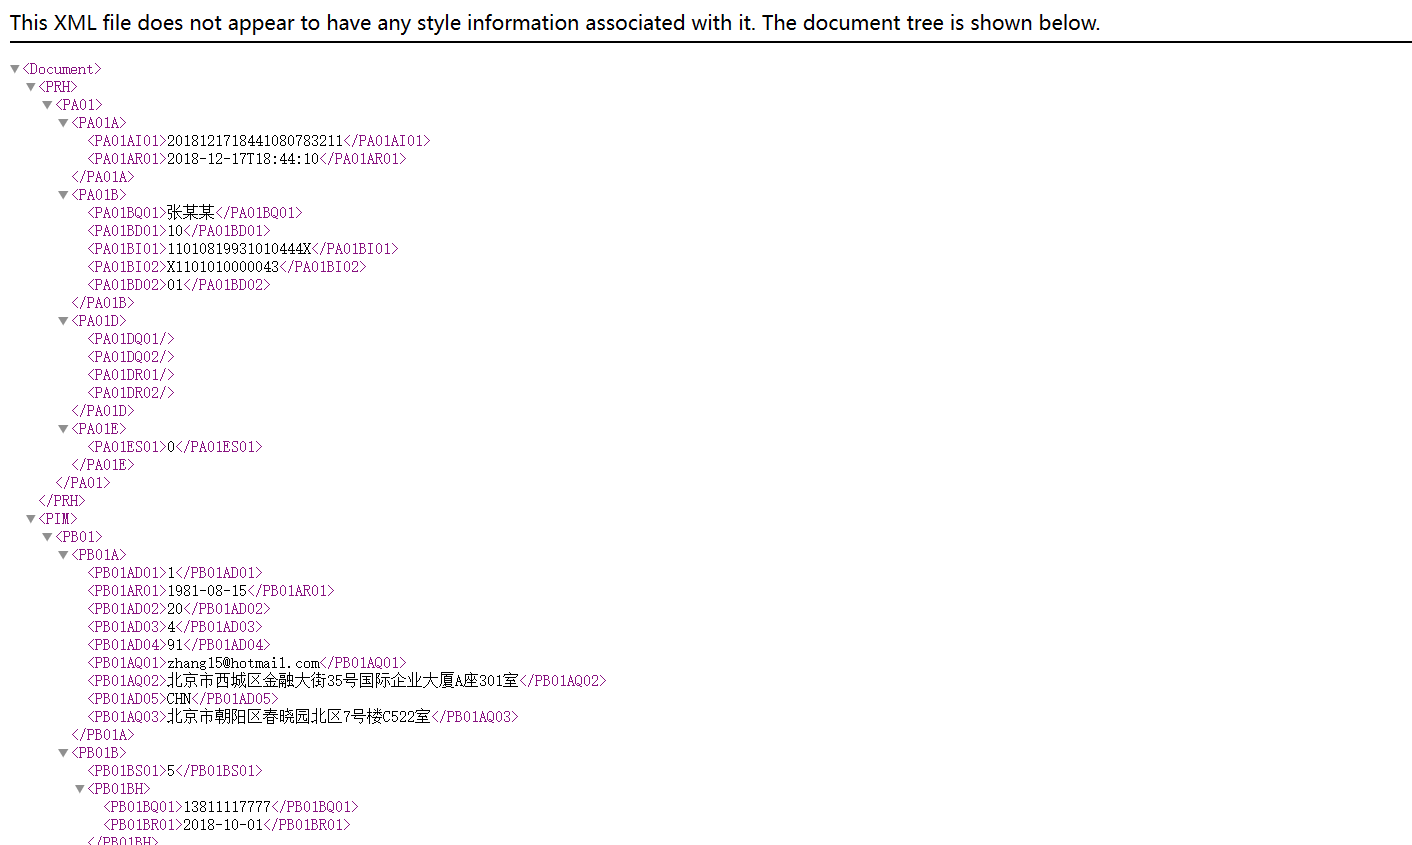

# 读取XML

In [2]:
# 转成json
with open('loan_credit.xml', encoding="UTF-8") as xml_file:
    parsed_data = xmltodict.parse(xml_file.read())
    xml_file.close()
    json_conversion = json.dumps(parsed_data, ensure_ascii=False)
    loan_credit=json.loads(json_conversion)

In [3]:
loan_credit['Document']['PRH'] # 变量名为字母数字，方便查看，后续转成中文

{'PA01': {'PA01A': {'PA01AI01': '2018121718441080783211',
   'PA01AR01': '2018-12-17T18:44:10'},
  'PA01B': {'PA01BQ01': '张某某',
   'PA01BD01': '10',
   'PA01BI01': '11010819931010444X',
   'PA01BI02': 'X1101010000043',
   'PA01BD02': '01'},
  'PA01D': {'PA01DQ01': None,
   'PA01DQ02': None,
   'PA01DR01': None,
   'PA01DR02': None},
  'PA01E': {'PA01ES01': '0'}}}

In [4]:
# 标签映射表
dic=pd.read_excel('映射.xlsx')
display(dic.head())
dic.index=dic['<XML Tag>'].to_list()

dic=dic['元素名'].to_dict()

,元素名,<XML Tag>
0,根元素,Document
1,报告头,PRH
2,报告头信息单元,PA01
3,报告标识信息段,PA01A
4,报告编号,PA01AI01


In [5]:
# 标签映射函数,变量名转成中文
def replace_dot(loan_credit,dic):
    
    keys_test=list(loan_credit.keys())

    for key in keys_test:
        try:
            if isinstance(loan_credit[key], dict):

                loan_credit[key] = replace_dot(loan_credit[key],dic)

            if isinstance(loan_credit[key], (tuple, list)):
                try:
                     for i in range(len(loan_credit[key])):

                        loan_credit[key][i]=replace_dot(loan_credit[key][i],dic)
                except:
                    newkey = dic[key]
                    loan_credit[newkey] = loan_credit.pop(key)
                    continue
                    
            newkey = dic[key]

            loan_credit[newkey] = loan_credit.pop(key)        
        except:
            continue
    return loan_credit

In [6]:
loan_credit1=copy.deepcopy(loan_credit)
dic1=copy.deepcopy(dic)

In [7]:
cridet_data=replace_dot(loan_credit1,dic1)

In [8]:
cridet_data['根元素']['报告头']

{'报告头信息单元': {'报告标识信息段': {'报告编号': '2018121718441080783211',
   '报告时间': '2018-12-17T18:44:10'},
  '本次查询请求信息段': {'被查询者姓名': '张某某',
   '被查询者证件类型': '10',
   '被查询者证件号码': '11010819931010444X',
   '查询机构代码': 'X1101010000043',
   '查询原因代码': '01'},
  '防欺诈警示信息段': {'防欺诈警示标志': None,
   '防欺诈警示联系电话': None,
   '防欺诈警示生效日期': None,
   '防欺诈警示截止日期': None},
  '异议提示信息段': {'异议标注数目': '0'}}}

In [9]:
cridet_data['根元素'].keys()

dict_keys(['报告头', '身份信息', '婚姻信息', '居住信息', '职业信息', '评分信息', '信贷交易信息概要', '非信贷交易信息概要', '公共信息概要', '查询记录概要', '授信协议信息', '借贷账户信息', '相关还款责任信息', '后付费业务信息', '欠税记录', '民事判决记录', '强制执行记录', '行政处罚记录', '住房公积金参缴记录', '低保救助记录', '执业资格记录', '行政奖励记录', '其他标注及声明信息', '查询记录'])

# 报告头

In [10]:
pd.DataFrame(cridet_data['根元素']['报告头']['报告头信息单元']['报告标识信息段'],index=['报告标识信息段'])

,报告编号,报告时间
报告标识信息段,2018121718441080783211,2018-12-17T18:44:10


In [11]:
pd.DataFrame(cridet_data['根元素']['报告头']['报告头信息单元']['本次查询请求信息段'],index=['本次查询请求信息段'])

,被查询者姓名,被查询者证件类型,被查询者证件号码,查询机构代码,查询原因代码
本次查询请求信息段,张某某,10,11010819931010444X,X1101010000043,01


In [12]:
pd.DataFrame(cridet_data['根元素']['报告头']['报告头信息单元']['防欺诈警示信息段'],index=['防欺诈警示信息段'])

,防欺诈警示标志,防欺诈警示联系电话,防欺诈警示生效日期,防欺诈警示截止日期
防欺诈警示信息段,None,None,None,None


In [13]:
pd.DataFrame(cridet_data['根元素']['报告头']['报告头信息单元']['异议提示信息段'],index=['异议提示信息段'])

,异议标注数目
异议提示信息段,0


# 身份信息

In [14]:
pd.DataFrame(cridet_data['根元素']['身份信息']['身份信息单元']['基本概况信息段'],index=['基本概况信息段'])

,性别,出生日期,学历,学位,就业状况,电子邮箱,通讯地址,国籍,户籍地址
基本概况信息段,1,1981-08-15,20,4,91,zhang15@hotmail.com,北京市西城区金融大街35号国际企业大厦A座301室,CHN,北京市朝阳区春晓园北区7号楼C522室


In [15]:
cridet_data['根元素']['身份信息']['身份信息单元']['手机号码信息段']['手机号码个数']

'5'

In [16]:
pd.DataFrame(cridet_data['根元素']['身份信息']['身份信息单元']['手机号码信息段']['手机号码信息'])

,手机号码,信息更新日期
0,13811117777,2018-10-01
1,13811112222,2018-09-22
2,13900000000,2017-02-01
3,13300000000,2017-01-22
4,18600000000,2016-11-12


# 婚姻信息

In [17]:
pd.DataFrame(cridet_data['根元素']['婚姻信息']['婚姻信息单元'],index=['婚姻信息单元'])

,婚姻状况,配偶姓名,配偶证件类型,配偶证件号码,配偶工作单位,配偶联系电话
婚姻信息单元,20,李金花,8,12356000000888,三星电子北京分公司财务部,13800003333


# 居住信息单元

In [18]:
pd.DataFrame(cridet_data['根元素']['居住信息']['居住信息单元'])

,居住状况,居住地址,住宅电话,信息更新日期
0,2,北京市朝阳区春晓园北区7号楼C555室,010-83234323,2018-10-01
1,4,北京市海淀区学院路20号院甲2号楼401室,010-62123212,2018-09-22
2,5,北京市西城区复兴门北大街4号楼603室,010-59873232,2017-02-01
3,5,北京市西城区西交民巷64号院1号楼201室,010-59000011,2017-01-22
4,5,北京市海淀区花园路10号院3号楼701室,010-57889900,2016-11-12


# 职业信息

In [19]:
pd.DataFrame(cridet_data['根元素']['职业信息']['职业信息单元'])

,就业状况,工作单位,单位性质,行业,单位地址,单位电话,职业,职务,职称,进入本单位年份,信息更新日期
0,91,中国人民银行征信中心企业部,10,J,北京市西城区金融大街35号国际企业大厦A座305室,010-83233333,3,2,2,2008,2018-10-01
1,91,北京大学信息科学技术学院软件工程研究所,10,M,北京市海淀区颐和园路5号理科3号楼601室,010-62123333,1,2,2,2007,2018-09-22
2,91,中科院微电子研究所,10,M,北京市海淀区清华园1号,010-59875555,1,3,3,2004,2017-02-01
3,91,北京威力公司,40,M,北京市朝阳区北土城西路3号,010-59006666,1,3,3,2003,2017-01-22
4,91,IBM软件中心,30,M,北京市朝阳区北辰东路8号,010-57889900,1,3,3,2001,2016-11-12


# 评分信息  
(本来是一条，但因分数说明有2，变成了两条，可以将list转成，变成一条)

In [20]:
pd.DataFrame(cridet_data['根元素']['评分信息']['评分信息单元'])

,数字解读,相对位置,分数说明条数,分数说明
0,514,1,2,01
1,514,1,2,05


# 信贷交易信息概要

In [21]:
cridet_data['根元素']['信贷交易信息概要']['信贷交易信息概要信息单元']['信贷交易提示信息段']

{'账户数合计': '7',
 '业务类型数量': '4',
 '信贷交易提示信息': [{'业务类型': '11', '业务大类': '1', '账户数': '2', '首笔业务发放月份': '2010-01'},
  {'业务类型': '19', '业务大类': '1', '账户数': '2', '首笔业务发放月份': '2014-09'},
  {'业务类型': '21', '业务大类': '2', '账户数': '2', '首笔业务发放月份': '2009-05'},
  {'业务类型': '22', '业务大类': '2', '账户数': '1', '首笔业务发放月份': '2009-05'}]}

In [22]:
cridet_data['根元素']['信贷交易信息概要']['信贷交易信息概要信息单元']['信贷交易提示信息段']['账户数合计']

'7'

In [23]:
cridet_data['根元素']['信贷交易信息概要']['信贷交易信息概要信息单元']['信贷交易提示信息段']['业务类型数量']

'4'

In [24]:
pd.DataFrame(cridet_data['根元素']['信贷交易信息概要']['信贷交易信息概要信息单元']['信贷交易提示信息段'][ '信贷交易提示信息'])

,业务类型,业务大类,账户数,首笔业务发放月份
0,11,1,2,2010-01
1,19,1,2,2014-09
2,21,2,2,2009-05
3,22,2,1,2009-05


In [25]:
pd.DataFrame(cridet_data['根元素']['信贷交易信息概要']['信贷交易信息概要信息单元']['被追偿汇总信息段'],index=['被追偿汇总信息段'])

,账户数合计,余额合计,业务类型数量,被追偿汇总信息
被追偿汇总信息段,1,0,1,NaN


In [26]:
pd.DataFrame(cridet_data['根元素']['信贷交易信息概要']['信贷交易信息概要信息单元']['呆账汇总信息段'],index=['呆账汇总信息段'])

,账户数,余额
呆账汇总信息段,1,17100


In [27]:
cridet_data['根元素']['信贷交易信息概要']['信贷交易信息概要信息单元']['逾期（透支）汇总信息段']['账户类型数量']

'5'

In [28]:
pd.DataFrame(cridet_data['根元素']['信贷交易信息概要']['信贷交易信息概要信息单元']['逾期（透支）汇总信息段']['逾期（透支）汇总信息'])

,账户类型,账户数,月份数,单月最高逾期（透支）总额,最长逾期（透支）月数
0,1,1,2,6100,2
1,2,1,2,6000,1
2,3,1,2,6100,2
3,4,1,8,24550,7
4,5,1,1,1000,3


In [29]:
pd.DataFrame(cridet_data['根元素']['信贷交易信息概要']['信贷交易信息概要信息单元']['非循环贷账户汇总信息段'],index=['非循环贷账户汇总信息段'])

,管理机构数,账户数,授信总额,余额,最近6 个月平均应还款
非循环贷账户汇总信息段,1,2,860000,417100,6000


In [30]:
pd.DataFrame(cridet_data['根元素']['信贷交易信息概要']['信贷交易信息概要信息单元']['循环额度下分账户汇总信息段'],index=['循环额度下分账户汇总信息段'])

,管理机构数,账户数,授信总额,余额,最近 6 个月平均应还款
循环额度下分账户汇总信息段,1,1,1200000,40000,2000


In [31]:
pd.DataFrame(cridet_data['根元素']['信贷交易信息概要']['信贷交易信息概要信息单元'][ '循环贷账户汇总信息段'],index=['循环贷账户汇总信息段'])

,管理机构数,账户数,授信总额,余额,最近 6 个月平均应还款
循环贷账户汇总信息段,1,1,70000,30000,5000


In [32]:
pd.DataFrame(cridet_data['根元素']['信贷交易信息概要']['信贷交易信息概要信息单元']['贷记卡账户汇总信息段'],index=['贷记卡账户汇总信息段'])

,发卡机构数,账户数,授信总额,单家行最高授信额,单家行最低授信额,已用额度,最近 6 个月平均使用额度
贷记卡账户汇总信息段,1,2,190000,160000,160000,135500,90000


In [33]:
pd.DataFrame(cridet_data['根元素']['信贷交易信息概要']['信贷交易信息概要信息单元'][ '准贷记卡账户汇总信息段'],index=[ '准贷记卡账户汇总信息段'])

,发卡机构数,账户数,授信总额,单家行最高授信额,单家行最低授信额,透支余额,最近 6 个月平均透支余额
准贷记卡账户汇总信息段,1,1,16000,16000,16000,1000,1000


In [34]:
cridet_data['根元素']['信贷交易信息概要']['信贷交易信息概要信息单元']['相关还款责任汇总信息段']['相关还款责任个数']

'2'

In [35]:
pd.DataFrame(cridet_data['根元素']['信贷交易信息概要']['信贷交易信息概要信息单元']['相关还款责任汇总信息段']['相关还款责任汇总信息'])

,借款人身份类别,还款责任类型,账户数,还款责任金额,余额
0,1,1,2,220000,110000
1,2,1,1,1375838,687919


# '非信贷交易信息概要'

In [36]:
cridet_data['根元素']['非信贷交易信息概要']['后付费业务欠费信息汇总信息单元']['后付费业务类型数量']

'1'

In [37]:
pd.DataFrame(cridet_data['根元素']['非信贷交易信息概要']['后付费业务欠费信息汇总信息单元']['后付费业务欠费信息 汇总信息'],index=['后付费业务欠费信息 汇总信息'])

,后付费业务类型,欠费账户数,欠费金额
后付费业务欠费信息 汇总信息,1,1,1000


# 公共信息概要

In [38]:
cridet_data['根元素']['公共信息概要']['公共信息概要信息单元']['公共信息类型数量']

'4'

In [39]:
pd.DataFrame(cridet_data['根元素']['公共信息概要']['公共信息概要信息单元']['公共信息概要信息'])

,公共信息类型,记录数,涉及金额
0,1,1,500
1,2,1,500000
2,3,1,420000
3,4,2,400


# 查询记录概要信息单元'

In [40]:
pd.DataFrame(cridet_data['根元素']['查询记录概要']['查询记录概要信息单元']['上一次查询记录信息段'],index=['上一次查询记录信息段'])

,上一次查询日期,上一次查询机构机构类型,上一次查询机构代码,上一次查询原因
上一次查询记录信息段,None,None,None,None


In [41]:
pd.DataFrame(cridet_data['根元素']['查询记录概要']['查询记录概要信息单元']['查询记录汇总信息段'],index=['查询记录汇总信息段'])

,最近 1 个月内的查询机构数（贷款审批）,最近 1 个月内的查询机构数（信用卡审批）,最近 1 个月内的查询次数（贷款审批）,最近 1 个月内的查询次数（信用卡审批）,最近 1 个月内的查询次数（本人查询）,最近 2 年内的查询次数（贷后管理）,最近 2 年内的查询次数（担保资格审查）,最近 2 年内的查询次数（特约商户实名审查）
查询记录汇总信息段,0,0,0,0,7,0,0,0


# 授信协议信息

In [42]:
ind=0
for i in range(len(cridet_data['根元素']['授信协议信息']['授信协议信息单元'])):
    if ind==0:
        data=pd.DataFrame(cridet_data['根元素']['授信协议信息']['授信协议信息单元'][i]['基本信息段'],index=[i])
        ind=1
    else:
        data=data.append(pd.DataFrame(cridet_data['根元素']['授信协议信息']['授信协议信息单元'][i]['基本信息段'],index=[i]))
data

C:\Users\37458\AppData\Local\Temp\ipykernel_35464\4260550837.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pd.DataFrame(cridet_data['根元素']['授信协议信息']['授信协议信息单元'][i]['基本信息段'],index=[i]))
C:\Users\37458\AppData\Local\Temp\ipykernel_35464\4260550837.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pd.DataFrame(cridet_data['根元素']['授信协议信息']['授信协议信息单元'][i]['基本信息段'],index=[i]))
C:\Users\37458\AppData\Local\Temp\ipykernel_35464\4260550837.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pd.DataFrame(cridet_data['根元素']['授信协议信息']['授信协议信息单元'][i]['基本信息段'],index=[i]))
C:\Users\37458\AppData\Local\Temp\ipykernel_35464\4260550837.py:7: FutureWarning: The frame.append method is 

,授信协议编号,业务管理机构类型,业务管理机构,授信协议标识,授信额度用途,授信额度,币种,生效日期,到期日期,授信协议状态,已用额度,授信限额,授信限额编号
0,49376,11,LX,B182,31,16000,CNY,2009-04-01,2099-12-31,1,1000,None,None
1,97257,11,LX,T274,31,30000,CNY,2017-04-01,2099-12-31,1,0,None,None
2,72247,11,LX,P213,10,1200000,USD,2012-10-01,2020-01-31,1,40000,None,None
3,88497,11,LX,G902,31,160000,CNY,2009-05-01,2099-12-31,1,135500,None,None
4,86490,11,LX,V011,10,70000,USD,2014-09-01,2019-01-31,1,30000,None,None
5,40660,11,LX,V968,20,500000,USD,2010-09-01,2020-01-31,1,500000,100000,U062


# 借贷账户信息

In [43]:
from termcolor import colored

In [44]:
dic_col={'基本信息段':1,
'最新表现信息段':1,
'最近一次月度表现信息段':1,
'最近 24 个月还款记录信息段':{'起始年月':0,'截止年月':0,'还款状态信息':2},
 '最近 5 年内历史表现信息段':{'起始年月':0,'截止年月':0,'月数':0,'历史表现信息':2},
 '特殊交易信息段':{'特殊交易个数':0,'特殊交易信息':1},
 '特殊事件说明信息段':{'特殊事件说明个数':0,'特殊事件说明信息':1},
'大额专项分期信息段':{'大额专项分期笔数':0,'大额专项分期信息':1}}

In [45]:
def pri_df(iind,df,key):
    if iind==0:
        print('%s:%s'%(key,df))
    elif iind==2:
        print(' %s 表'%(key))
        display(pd.DataFrame(df))
    else:
        print(' %s 表'%(key))
        display(pd.DataFrame(df,index=[key]))
    return 

In [46]:
for i in range(len(cridet_data['根元素']['借贷账户信息']['借贷账户信息单元'])):
    print(colored('第 %s 条\n \n'%(i), attrs=['bold']))
    for j in cridet_data['根元素']['借贷账户信息']['借贷账户信息单元'][i].keys():
        if isinstance(dic_col[j], dict):
            for k in cridet_data['根元素']['借贷账户信息']['借贷账户信息单元'][i][j].keys():
                df=cridet_data['根元素']['借贷账户信息']['借贷账户信息单元'][i][j][k]
                pri_df(dic_col[j][k],df,k)
        else:
            df=cridet_data['根元素']['借贷账户信息']['借贷账户信息单元'][i][j]
            pri_df(dic_col[j],df,j)
    print(colored('\n \n', attrs=['bold']))

第 0 条
 

 基本信息段 表


,账户编号,账户类型,业务管理机构类型,业务管理机构代码,业务种类,开立日期,借款金额,债权转移时的还款状态
基本信息段,38257,C1,53,TN,B1,2007-11-08,10000,2


 最新表现信息段 表


,账户状态,关闭日期,余额,最近一次还款日期,信息报告日期
最新表现信息段,2,2018-01-20,None,None,2018-01-20


特殊交易个数:1
 特殊交易信息 表


,特殊交易类型,特殊交易发生日期,到期日期变更月数,特殊交易发生金额,特殊交易明细记录
特殊交易信息,2,2018-01-20,0,10000,"该贷款由XX公司代偿10,000元"



 

第 1 条
 

 基本信息段 表


,账户编号,账户类型,业务管理机构类型,业务管理机构代码,账户标识,授信协议编号,业务种类,开立日期,币种,借款金额,到期日期,还款方式,还款频率,还款期数,担保方式,贷款发放形式,共同借款标志
基本信息段,38723,D1,11,LX,None,40660,11,2010-09-22,USD,500000,2025-09-21,12,03,180,2,5,0


 最新表现信息段 表


,账户状态,关闭日期,转出月份,余额,最近一次还款日期,最近一次还款金额,五级分类,还款状态,信息报告日期
最新表现信息段,None,None,None,394000,2018-10-31,6100,1,N,2018-10-31


 最近一次月度表现信息段 表


,月份,账户状态,余额,五级分类,剩余还款期数,结算/应还款日,本月应还款,本月实还款,最近一次还款日期,当前逾期期数,当前逾期总额,逾期 31—60 天未还本金,逾期 61－90 天未还本金,逾期 91－180 天未还本金,逾期 180 天以上未还本金,信息报告日期
最近一次月度表现信息段,2018-10,2,400000,3,125,2018-10-05,5000,0,2018-10-05,2,6100,1000,0,0,0,2018-10-05


起始年月:2016-11
截止年月:2018-10
 还款状态信息 表


,月份,还款状态
0,2018-10,2
1,2018-09,1
2,2018-08,N
3,2018-07,N
4,2018-06,N
5,2018-05,N
6,2018-04,N
7,2018-03,N
8,2018-02,N
9,2018-01,N


起始年月:2014-01
截止年月:2018-10
月数:58
 历史表现信息 表


,月份,还款状态,逾期（透支）总额
0,2018-10,2,6100
1,2018-09,1,3000
2,2018-08,N,0
3,2018-07,N,0
4,2018-06,N,0
5,2018-05,N,0
6,2018-04,N,0
7,2018-03,N,0
8,2018-02,N,0
9,2018-01,N,0


特殊交易个数:1
 特殊交易信息 表


,特殊交易类型,特殊交易发生日期,到期日期变更月数,特殊交易发生金额,特殊交易明细记录
特殊交易信息,2,2017-07-05,0,20000,该贷款由阿里公司代偿20000元



 

第 2 条
 

 基本信息段 表


,账户编号,账户类型,业务管理机构类型,业务管理机构代码,账户标识,授信协议编号,业务种类,开立日期,币种,借款金额,到期日期,还款方式,还款频率,还款期数,担保方式,贷款发放形式,共同借款标志
基本信息段,76772,D1,11,LX,None,None,11,2010-01-22,CNY,360000,2020-01-19,12,03,180,2,1,1


 最新表现信息段 表


,账户状态,关闭日期,转出月份,余额,最近一次还款日期,最近一次还款金额,五级分类,还款状态,信息报告日期
最新表现信息段,4,None,None,17100,2018-10-25,None,None,None,2018-10-25


起始年月:2016-11
截止年月:2018-10
 还款状态信息 表


,月份,还款状态
0,2018-10,B
1,2018-09,B
2,2018-08,B
3,2018-07,B
4,2018-06,B
5,2018-05,B
6,2018-04,B
7,2018-03,B
8,2018-02,B
9,2018-01,B


起始年月:2014-01
截止年月:2018-10
月数:58
 历史表现信息 表


,月份,还款状态,逾期（透支）总额
0,2018-10,B,17100
1,2018-09,B,17000
2,2018-08,B,16900
3,2018-07,B,16800
4,2018-06,B,16700
5,2018-05,B,16600
6,2018-04,B,16500
7,2018-03,B,16400
8,2018-02,B,16300
9,2018-01,B,16200



 

第 3 条
 

 基本信息段 表


,账户编号,账户类型,业务管理机构类型,业务管理机构代码,账户标识,授信协议编号,业务种类,开立日期,币种,账户授信额度,到期日期,还款方式,还款频率,担保方式,共同借款标志
基本信息段,93483,R1,11,LX,None,86490,91,2016-07-22,USD,70000,2019-01-31,31,03,2,0


 最新表现信息段 表


,账户状态,关闭日期,余额,最近一次还款日期,最近一次还款金额,五级分类,还款状态,信息报告日期
最新表现信息段,None,None,30000,2018-10-05,None,3,2,2018-10-05


 最近一次月度表现信息段 表


,月份,账户状态,余额,五级分类,剩余还款期数,结算/应还款日,本月应还款,本月实还款,最近一次还款日期,当前逾期期数,当前逾期总额,逾期 31—60 天未还本金,逾期 61－90 天未还本金,逾期 91－180 天未还本金,逾期 180 天以上未还本金,信息报告日期
最近一次月度表现信息段,2018-10,2,30000,3,20,2018-10-05,5000,0,2018-10-05,2,6100,1000,0,0,0,2018-10-05


起始年月:2016-11
截止年月:2018-10
 还款状态信息 表


,月份,还款状态
0,2018-10,2
1,2018-09,1
2,2018-08,N
3,2018-07,N
4,2018-06,N
5,2018-05,N
6,2018-04,N
7,2018-03,N
8,2018-02,N
9,2018-01,N


起始年月:2016-07
截止年月:2018-10
月数:28
 历史表现信息 表


,月份,还款状态,逾期（透支）总额
0,2018-10,2,6100
1,2018-09,1,6000
2,2018-08,N,0
3,2018-07,N,0
4,2018-06,N,0
5,2018-05,N,0
6,2018-04,N,0
7,2018-03,N,0
8,2018-02,N,0
9,2018-01,N,0



 

第 4 条
 

 基本信息段 表


,账户编号,账户类型,业务管理机构类型,业务管理机构代码,账户标识,授信协议编号,业务种类,开立日期,币种,账户授信额度,共享授信额度,担保方式
基本信息段,97664,R2,11,LX,None,88497,81,2009-05-22,CNY,160000,None,4


 最新表现信息段 表


,账户状态,关闭日期,余额,最近一次还款日期,最近一次还款金额,还款状态,信息报告日期
最新表现信息段,None,None,230950,2018-09-25,24550,N,2018-09-25


 最近一次月度表现信息段 表


,月份,账户状态,余额,已用额度,未出单的大额专项分期余额,剩余还款期数,结算/应还款日,本月应还款,本月实还款,最近一次还款日期,当前逾期期数,当前逾期总额,最近 6 个月平均使用额度,最大使用额度,信息报告日期
最近一次月度表现信息段,2018-09,1,255500,135500,110000,11,2018-09-12,24500,0,2018-09-10,1,24550,90000,150000,2018-09-12


起始年月:2016-10
截止年月:2018-09
 还款状态信息 表


,月份,还款状态
0,2018-09,1
1,2018-08,N
2,2018-07,N
3,2018-06,N
4,2018-05,N
5,2018-04,N
6,2018-03,N
7,2018-02,N
8,2018-01,N
9,2017-12,7


起始年月:2014-01
截止年月:2018-09
月数:57
 历史表现信息 表


,月份,还款状态,逾期（透支）总额
0,2018-09,1,24550
1,2018-08,N,0
2,2018-07,N,0
3,2018-06,N,0
4,2018-05,N,0
5,2018-04,N,0
6,2018-03,N,0
7,2018-02,N,0
8,2018-01,N,0
9,2017-12,7,10000


特殊事件说明个数:1
 特殊事件说明信息 表


,特殊事件发生月份,特殊事件类型
特殊事件说明信息,2018-10,11


大额专项分期笔数:1
 大额专项分期信息 表


,大额专项分期额度,分期额度生效日期,分期额度到期日期,已用分期金额
大额专项分期信息,120000,2018-08-12,2019-08-11,120000



 

第 5 条
 

 基本信息段 表


,账户编号,账户类型,业务管理机构类型,业务管理机构代码,账户标识,授信协议编号,业务种类,开立日期,币种,账户授信额度,共享授信额度,担保方式
基本信息段,98456,R2,11,LX,None,97257,81,2017-05-28,CNY,30000,50000,4


 最新表现信息段 表


,账户状态,关闭日期,余额,最近一次还款日期,最近一次还款金额,还款状态,信息报告日期
最新表现信息段,6,None,0,None,None,None,2017-05-28



 

第 6 条
 

 基本信息段 表


,账户编号,账户类型,业务管理机构类型,业务管理机构代码,账户标识,授信协议编号,开立日期,币种,账户授信额度,共享授信额度,担保方式
基本信息段,17349,R3,11,LX,None,49376,2009-05-22,CNY,16000,None,4


 最新表现信息段 表


,账户状态,关闭日期,余额,最近一次还款日期,最近一次还款金额,还款状态,信息报告日期
最新表现信息段,None,None,1000,2018-10-19,None,3,2018-10-19


 最近一次月度表现信息段 表


,月份,账户状态,余额,结算/应还款日,本月实还款,最近一次还款日期,透支 180 天以上未付余额,最近 6 个月平均透支余额,最大透支余额,信息报告日期
最近一次月度表现信息段,2018-10,1,1000,2018-10-19,0,2018-10-19,0,1000,2000,2018-10-19


起始年月:2016-11
截止年月:2018-10
 还款状态信息 表


,月份,还款状态
0,2018-10,3
1,2018-09,2
2,2018-08,1
3,2018-07,1
4,2018-06,1
5,2018-05,1
6,2018-04,N
7,2018-03,N
8,2018-02,N
9,2018-01,N


起始年月:2014-01
截止年月:2018-10
月数:58
 历史表现信息 表


,月份,还款状态,逾期（透支）总额
0,2018-10,3,1000
1,2018-09,2,900
2,2018-08,1,800
3,2018-07,1,1000
4,2018-06,1,1100
5,2018-05,1,1200
6,2018-04,N,0
7,2018-03,N,0
8,2018-02,N,0
9,2018-01,N,0



 

第 7 条
 

 基本信息段 表


,账户编号,账户类型,业务管理机构类型,业务管理机构代码,账户标识,授信协议编号,业务种类,开立日期,币种,借款金额,到期日期,还款方式,还款频率,还款期数,担保方式,共同借款标志
基本信息段,56413,R4,11,LX,None,72247,91,2014-09-22,USD,500000,2019-09-21,11,03,60,2,0


 最新表现信息段 表


,账户状态,关闭日期,余额,最近一次还款日期,最近一次还款金额,五级分类,还款状态,信息报告日期
最新表现信息段,None,None,40000,2018-10-05,None,1,N,2018-10-05


 最近一次月度表现信息段 表


,月份,账户状态,余额,五级分类,剩余还款期数,结算/应还款日,本月应还款,本月实还款,最近一次还款日期,当前逾期期数,当前逾期总额,逾期 31—60 天未还本金,逾期 61－90 天未还本金,逾期 91－180 天未还本金,逾期 180 天以上未还本金,信息报告日期
最近一次月度表现信息段,2018-10,1,40000,1,16,2018-10-05,5000,5000,2018-10-05,0,0,0,0,0,0,2018-10-05


起始年月:2016-11
截止年月:2018-10
 还款状态信息 表


,月份,还款状态
0,2018-10,N
1,2018-09,N
2,2018-08,N
3,2018-07,N
4,2018-06,N
5,2018-05,N
6,2018-04,N
7,2018-03,N
8,2018-02,N
9,2018-01,N


起始年月:2014-09
截止年月:2018-10
月数:50
 历史表现信息 表


,月份,还款状态,逾期（透支）总额
0,2018-10,N,0
1,2018-09,N,0
2,2018-08,N,0
3,2018-07,N,0
4,2018-06,N,0
5,2018-05,N,0
6,2018-04,N,0
7,2018-03,N,0
8,2018-02,N,0
9,2018-01,N,0


# 相关还款责任信息

In [47]:
ind=0
for i in range(len(cridet_data['根元素']['相关还款责任信息']['相关还款责任信息单元'])):
    if ind==0:
        data=pd.DataFrame(cridet_data['根元素']['相关还款责任信息']['相关还款责任信息单元'][i]['相关还款责任信息段'],index=[i])
        ind=1
    else:
        data=data.append(pd.DataFrame(cridet_data['根元素']['相关还款责任信息']['相关还款责任信息单元'][i]['相关还款责任信息段'],index=[i]))
data

C:\Users\37458\AppData\Local\Temp\ipykernel_35464\866252065.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pd.DataFrame(cridet_data['根元素']['相关还款责任信息']['相关还款责任信息单元'][i]['相关还款责任信息段'],index=[i]))
C:\Users\37458\AppData\Local\Temp\ipykernel_35464\866252065.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pd.DataFrame(cridet_data['根元素']['相关还款责任信息']['相关还款责任信息单元'][i]['相关还款责任信息段'],index=[i]))


,主借款人身份类别,业务管理机构类型,业务管理机构,业务种类,开立日期,到期日期,相关还款责任人类型,保证合同编号,相关还款责任金额,币种,余额,五级分类,账户类型,还款状态,逾期月数,信息报告日期
0,1,11,VB,81,2011-05-15,2099-12-31,2,Q280,20000,CNY,10000,1,R2,N,None,2018-10-25
1,1,11,VB,91,2014-05-15,2019-05-14,2,E983,200000,CNY,100000,1,D1,N,None,2018-10-25
2,2,11,VB,11,2014-05-15,2019-05-14,2,V003,200000,USD,100000,3,None,None,2,2018-10-25


# 后付费业务信息

In [48]:
ind=0
for i in range(len(cridet_data['根元素']['后付费业务信息']['后付费业务信息单元'])):
    if ind==0:
        data=pd.DataFrame(cridet_data['根元素']['后付费业务信息']['后付费业务信息单元'][i]['后付费业务信息段'],index=[i])
        data2=pd.DataFrame(cridet_data['根元素']['后付费业务信息']['后付费业务信息单元'][i]['标注及声明信息段'],index=[i])
        ind=1
    else:
        data=data.append(pd.DataFrame(cridet_data['根元素']['后付费业务信息']['后付费业务信息单元'][i]['后付费业务信息段'],index=[i]))
        data2=data2.append(pd.DataFrame(cridet_data['根元素']['后付费业务信息']['后付费业务信息单元'][i]['标注及声明信息段'],index=[i]))
display(data.merge(data2,how='left',left_index=True,right_index=True))

C:\Users\37458\AppData\Local\Temp\ipykernel_35464\1182862745.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pd.DataFrame(cridet_data['根元素']['后付费业务信息']['后付费业务信息单元'][i]['后付费业务信息段'],index=[i]))
C:\Users\37458\AppData\Local\Temp\ipykernel_35464\1182862745.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data2=data2.append(pd.DataFrame(cridet_data['根元素']['后付费业务信息']['后付费业务信息单元'][i]['标注及声明信息段'],index=[i]))
C:\Users\37458\AppData\Local\Temp\ipykernel_35464\1182862745.py:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pd.DataFrame(cridet_data['根元素']['后付费业务信息']['后付费业务信息单元'][i]['后付费业务信息段'],index=[i]))
C:\Users\37458\AppData\Local\Temp\ipykernel_35464\1182862745.py:9: FutureWarning: The frame.

,后付费账户类型,机构名称,业务类型,业务开通日期,当前缴费状态,当前欠费金额,记账年月,最近 24 个月缴费记录,标注及声明个数,标注及声明信息
0,TE,中国电信集团江苏省电信公司,1,2009-08-17,1,1000,2018-10,NNNNNNNNNNNNNNNNNNNNNN12,0,None
1,TE,中国电信集团江苏省电信公司,2,2012-08-17,0,0,2018-10,#NNNNN1NNNNNNNNNNNNNNNNN,0,None
2,TE,人力资源和社会保障部,02,None,1,200,2018-10,None,0,None


# 欠税记录信息单元

In [49]:
pd.DataFrame(cridet_data['根元素']['欠税记录']['欠税记录信息单元']['欠税记录信息段'],index=['欠税记录信息段'])

,主管税务机关,欠税总额,欠税统计日期
欠税记录信息段,北京市东城区地税局,500,2017-03-17


# 民事判决记录

In [50]:
pd.DataFrame(cridet_data['根元素']['民事判决记录']['民事判决记录信息单元']['民事判决记录信息段'],index=['民事判决记录信息段'])

,立案法院,案由,立案日期,结案方式,判决/调解结果,判决/调解生效日期,诉讼标的,诉讼标的金额
民事判决记录信息段,北京市西城区人民法院,None,2014-09-11,1,"被告张某某赔偿原告李四人民币500,000元",2018-07-09,房屋买卖纠纷,500000


# 强制执行记录

In [51]:
pd.DataFrame(cridet_data['根元素']['强制执行记录']['强制执行记录信息单元']['强制执行记录信息段'],index=['强制执行记录信息段'])

,执行法院,执行案由,立案日期,结案方式,案件状态,结案日期,申请执行标的,申请执行标的金额,已执行标的,已执行标的金额
强制执行记录信息段,北京市西城区人民法院,None,2015-09-11,004,执行完毕,2017-09-15,房屋,420000,房屋买卖纠纷,420000


# 行政处罚记录

In [52]:
ind=0
for i in range(len(cridet_data['根元素']['行政处罚记录']['行政处罚记录信息单元'])):
    if ind==0:
        data=pd.DataFrame(cridet_data['根元素']['行政处罚记录']['行政处罚记录信息单元'][i]['行政处罚记录信息段'],index=[i])
        ind=1
    else:
        data=data.append(pd.DataFrame(cridet_data['根元素']['行政处罚记录']['行政处罚记录信息单元'][i]['行政处罚记录信息段'],index=[i]))
data

C:\Users\37458\AppData\Local\Temp\ipykernel_35464\1196962846.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data=data.append(pd.DataFrame(cridet_data['根元素']['行政处罚记录']['行政处罚记录信息单元'][i]['行政处罚记录信息段'],index=[i]))


,处罚机构,处罚内容,处罚金额,处罚生效日期,处罚截止日期,行政复议结果
0,北京市西城区地方税务局,责令限期改正、没收违法所得,400,2016-08,None,None
1,北京市建设管理服务中心,暂扣或者吊销许可证、暂扣或者吊销执照,None,2015-07,2016-07,None


# 住房公积金参缴记录

In [53]:
pd.DataFrame(cridet_data['根元素']['住房公积金参缴记录']['住房公积金参缴记录信息单元']['住房公积金参缴记录信息段'],index=['住房公积金参缴记录信息段'])

,参缴地,参缴日期,缴费状态,初缴月份,缴至月份,单位缴存比例,个人缴存比例,月缴存额,缴费单位,信息更新日期
住房公积金参缴记录信息段,110000,2008-08-01,1,2008-08,2008-11,12,12,1000,北京银行,2018-10-01


# 低保救助记录

In [54]:
pd.DataFrame(cridet_data['根元素']['低保救助记录']['低保救助记录信息单元']['低保救助记录信息段'],index=['低保救助记录信息段'])

,人员类别,所在地,工作单位,家庭月收入,申请日期,批准日期,信息更新日期
低保救助记录信息段,1,110000,None,200,1995-01-08,1995-03-08,2018-12-15


# 执业资格记录

In [55]:
pd.DataFrame(cridet_data['根元素']['执业资格记录']['执业资格记录信息单元']['执业资格记录信息段'],index=['执业资格记录信息段'])

,执业资格名称,颁发机构,等级,机构所在地,获得年月,到期年月,吊销年月
执业资格记录信息段,会计从业资格证书,北京市财政厅,2,110105,2007-05,2029-03,0000-00


# 行政奖励记录

In [56]:
pd.DataFrame(cridet_data['根元素']['行政奖励记录']['行政奖励记录信息单元']['行政奖励记录信息段'],index=['行政奖励记录信息段'])

,奖励机构,奖励内容,生效年月,截止年月
行政奖励记录信息段,北京市建筑管理服务中心,先进生产者,2017-05,2019-05


# 其他标注及声明信息

In [57]:
cridet_data['根元素']['其他标注及声明信息']

# 查询记录

In [58]:
cridet_data['根元素']['查询记录']